# Exploratory Data Analysis (EDA) on Football Database ⚽

This notebook performs an exploratory data analysis (EDA) on a football database.  
The dataset contains information about players, leagues, teams, games, shots, team statistics, and player appearances.  
The goal is to understand the data, clean it, and perform some initial analyses.



## Table of Contents

### 1. **Importing Libraries**
### 2. **Loading the Data**  
   - 2.1 Loading the Data  
   - 2.2 Basic Observations and Data Understanding  
### 3. **Data Exploration**  
   - 3.1 General Overview  
   - 3.2 Data Exploration Class  
   - 3.3 Exploring Team Statistics  
   - 3.4 Exploring Players Data  
   - 3.5 Exploring Leagues Data  
   - 3.6 Exploring Teams Data  
   - 3.7 Exploring Games Data  
   - 3.8 Exploring Shots Data  
   - 3.9 Exploring Appearances Data  
### 4. **Data Cleaning & Transformation**  
   - 4.1 Removing Betting Related Fields  
   - 4.2 Handling Missing Values  
### 5. **El Clásico Analysis**  
   - 5.1 Filtering Teams  
   - 5.2 Merging Data for El Clásico  
   - 5.3 Calculating Win Counts  
### 6. **Top Goal Scorers and Assisters**  
   - 6.1 Top Goal Scorers  
   - 6.2 Top Assisters  
### 7. **Exploratory Data Analysis**  
   - 7.1 Goals Analysis  
   - 7.2 Yellow Cards Analysis  
   - 7.3 Red Cards Analysis  
### 8. Visualizations
### 9. **Conclusion**


## 1. Importing Libraries

We start by importing the necessary libraries for data manipulation and visualization.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"])

     ------------------------------------ 294.9/294.9 kB 207.0 kB/s eta 0:00:00


## 2. Loading the Data

### 2.1 Loading the Data

We load the data from the CSV files provided in the dataset. 

**Data Set Link :** [Football Database](https://www.kaggle.com/datasets/technika148/football-database?select=appearances.csv) 

In [33]:
import os

# List all files in the directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the data
players = pd.read_csv("C:\\Users\\pc\\Desktop\\DataWarehouseProject\\data\\players.csv", encoding='ISO-8859-1')
leagues = pd.read_csv('C:\\Users\\pc\\Desktop\\DataWarehouseProject\\data\\leagues.csv', encoding='ISO-8859-1')
teams = pd.read_csv('C:\\Users\\pc\\Desktop\\DataWarehouseProject\\data\\teams.csv', encoding='ISO-8859-1')
games = pd.read_csv('C:\\Users\\pc\\Desktop\\DataWarehouseProject\\data\\games.csv')
shots = pd.read_csv('C:\\Users\\pc\\Desktop\\DataWarehouseProject\\data\\shots.csv')
teamstats = pd.read_csv('C:\\Users\\pc\\Desktop\\DataWarehouseProject\\data\\teamstats.csv')
appearances = pd.read_csv('C:\\Users\\pc\\Desktop\\DataWarehouseProject\\data\\appearances.csv')

### 2.2 Basic Observations and Data Understanding

We create a summary table to understand the structure of each dataset.

In [34]:
dfs = [players, leagues, teams, games, shots, teamstats, appearances]
df_names = ['players', 'leagues', 'teams', 'games', 'shots', 'teamstats', 'appearances']

# Create a summary table
summary = {
    "DataFrame": [],
    "No. of Columns": [],
    "No. of Rows": [],
    "Datatype Aggregation": []
}

for name, df in zip(df_names, dfs):
    summary["DataFrame"].append(name)
    summary["No. of Columns"].append(df.shape[1])
    summary["No. of Rows"].append(df.shape[0])
    summary["Datatype Aggregation"].append(df.dtypes.value_counts().to_dict())

# Convert the summary into a dataframe
summary_df = pd.DataFrame(summary)
summary_df

,DataFrame,No. of Columns,No. of Rows,Datatype Aggregation
0,players,2,7659,"{int64: 1, object: 1}"
1,leagues,3,5,"{object: 2, int64: 1}"
2,teams,2,146,"{int64: 1, object: 1}"
3,games,34,12680,"{float64: 24, int64: 9, object: 1}"
4,shots,11,324542,"{float64: 4, object: 4, int64: 3}"
5,teamstats,16,25360,"{int64: 10, object: 3, float64: 3}"
6,appearances,19,356513,"{int64: 14, float64: 4, object: 1}"


## 3. Data Exploration


### 3.1 General Overview

* The dataset consists of a total of **726,906 rows and 87 columns** across seven tables.

* The `players, leagues, and teams` tables are relatively small, focusing on primary identifiers and names. 
* The `teamstats table` contains team records for each game. `The shots and appearances tables` contain the most records, with **324,543 and 356,513 rows**, respectively.

### 3.2 Data Exploration Class
We define a class to help with data exploration.

In [56]:
class DataExploration:
    def __init__(self, df: pd.DataFrame):
        self.df = df
    
    def show_top_records(self, n=5):
        print(f"\n TOP {n} RECORDS")
        display(self.df.head(n))
    
    def show_info(self):
        print(f"\n Data INFO ")
        display(self.df.info())

    def show_shape(self):
        print(f"\nSHAPE OF DATA {self.df.shape}")
    
    def run_eda(self):
        self.show_top_records()
        self.show_info()
        self.show_shape()

### 3.3 Exploring Team Statistics
We explore the `teamstats` dataset.

In [36]:
eda = DataExploration(teamstats)
eda.run_eda()


 TOP 5 RECORDS


,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,8/8/2015 15:45,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,8/8/2015 15:45,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,8/8/2015 18:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,8/8/2015 18:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,8/8/2015 18:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D



 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25360 entries, 0 to 25359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameID         25360 non-null  int64  
 1   teamID         25360 non-null  int64  
 2   season         25360 non-null  int64  
 3   date           25360 non-null  object 
 4   location       25360 non-null  object 
 5   goals          25360 non-null  int64  
 6   xGoals         25360 non-null  float64
 7   shots          25360 non-null  int64  
 8   shotsOnTarget  25360 non-null  int64  
 9   deep           25360 non-null  int64  
 10  ppda           25360 non-null  float64
 11  fouls          25360 non-null  int64  
 12  corners        25360 non-null  int64  
 13  yellowCards    25359 non-null  float64
 14  redCards       25360 non-null  int64  
 15  result         25360 non-null  object 
dtypes: float64(3), int64(10), object(3)
memory usage: 3.1+ MB


None


SHAPE OF DATA (25360, 16)


### 3.4 Exploring Players Data
We explore the `players` dataset.

In [37]:
eda_players = DataExploration(players)
eda_players.run_eda()


 TOP 5 RECORDS


,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw



 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  7659 non-null   int64 
 1   name      7659 non-null   object
dtypes: int64(1), object(1)
memory usage: 119.8+ KB


None


SHAPE OF DATA (7659, 2)


### 3.5 Exploring Leagues Data
We explore the `leagues` dataset.

In [38]:
eda_leagues = DataExploration(leagues)
eda_leagues.run_eda()


 TOP 5 RECORDS


,leagueID,name,understatNotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1



 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   leagueID           5 non-null      int64 
 1   name               5 non-null      object
 2   understatNotation  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


None


SHAPE OF DATA (5, 3)


### 3.6 Exploring Teams Data
We explore the `teams` dataset.

In [39]:
eda_teams = DataExploration(teams)
eda_teams.run_eda()


 TOP 5 RECORDS


,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion



 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teamID  146 non-null    int64 
 1   name    146 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


None


SHAPE OF DATA (146, 2)


### 3.7 Exploring Games Data
We explore the `games` dataset.

In [40]:
eda_games = DataExploration(games)
eda_games.run_eda()


 TOP 5 RECORDS


,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,...,5.90,1.62,3.6,6.00,1.67,4.00,5.75,1.64,4.07,6.04
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,...,4.27,1.91,3.5,4.00,2.00,3.50,4.20,1.82,3.88,4.70
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,...,5.62,1.73,3.5,5.00,1.73,3.90,5.40,1.75,3.76,5.44
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,...,4.34,2.00,3.1,2.70,2.00,3.40,4.33,1.79,3.74,5.10
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,...,3.08,2.60,3.1,2.88,2.60,3.25,3.00,2.46,3.39,3.14



 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameID             12680 non-null  int64  
 1   leagueID           12680 non-null  int64  
 2   season             12680 non-null  int64  
 3   date               12680 non-null  object 
 4   homeTeamID         12680 non-null  int64  
 5   awayTeamID         12680 non-null  int64  
 6   homeGoals          12680 non-null  int64  
 7   awayGoals          12680 non-null  int64  
 8   homeProbability    12680 non-null  float64
 9   drawProbability    12680 non-null  float64
 10  awayProbability    12680 non-null  float64
 11  homeGoalsHalfTime  12680 non-null  int64  
 12  awayGoalsHalfTime  12680 non-null  int64  
 13  B365H              12675 non-null  float64
 14  B365D              12675 non-null  float64
 15  B365A              12675 non-null  float64
 16  BWH            

None


SHAPE OF DATA (12680, 34)


### 3.8 Exploring Shots Data
We explore the `shots` dataset.

In [41]:
eda_shots = DataExploration(shots)
eda_shots.run_eda()


 TOP 5 RECORDS


,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707



 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324542 entries, 0 to 324541
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   gameID      324542 non-null  int64  
 1   shooterID   324542 non-null  int64  
 2   assisterID  240198 non-null  float64
 3   minute      324542 non-null  int64  
 4   situation   324542 non-null  object 
 5   lastAction  287646 non-null  object 
 6   shotType    324542 non-null  object 
 7   shotResult  324542 non-null  object 
 8   xGoal       324542 non-null  float64
 9   positionX   324542 non-null  float64
 10  positionY   324542 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 27.2+ MB


None


SHAPE OF DATA (324542, 11)


### 3.9 Exploring Appearances Data
We explore the `appearances` dataset.

In [42]:
eda_appearances = DataExploration(appearances)
eda_appearances.run_eda()


 TOP 5 RECORDS


,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,81,557,0,0,0,0.0,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1
2,81,548,0,0,0,0.0,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1
3,81,628,0,0,0,0.0,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.0,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1



 INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356513 entries, 0 to 356512
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameID         356513 non-null  int64  
 1   playerID       356513 non-null  int64  
 2   goals          356513 non-null  int64  
 3   ownGoals       356513 non-null  int64  
 4   shots          356513 non-null  int64  
 5   xGoals         356513 non-null  float64
 6   xGoalsChain    356513 non-null  float64
 7   xGoalsBuildup  356513 non-null  float64
 8   assists        356513 non-null  int64  
 9   keyPasses      356513 non-null  int64  
 10  xAssists       356513 non-null  float64
 11  position       356513 non-null  object 
 12  positionOrder  356513 non-null  int64  
 13  yellowCard     356513 non-null  int64  
 14  redCard        356513 non-null  int64  
 15  time           356513 non-null  int64  
 16  substituteIn   356513 non-null  int64  
 17  substituteOut  356513 

None


SHAPE OF DATA (356513, 19)


## 4. Data Cleaning & Transformation


### 4.1 Removing Betting Related Fields
We remove betting-related fields from the games dataset.

In [43]:
games = games.iloc[:, 0:13]  # Remove betting related fields

### 4.2 Handling Missing Values
We handle missing values in the teamstats dataset.

In [44]:
teamstats['yellowCards'].replace(["None"], [0], inplace=True)

## 5. El Clásico Analysis

### 5.1 Filtering Teams
We filter the teams involved in El Clásico (Barcelona and Real Madrid).

In [45]:
filtered_teams = teams[teams['name'].str.startswith('Bar') | teams['name'].str.contains('Real M')]
filtered_teams.head()

,teamID,name
41,148,Barcelona
42,150,Real Madrid


### 5.2 Merging Data for El Clásico
We merge the data to analyze El Clásico matches.

In [46]:
el_classico = (
    teamstats
    .merge(teams, on="teamID", how="inner")
    .merge(games, on="gameID", how="inner")
    .query("(homeTeamID == 148 and awayTeamID == 150) or (homeTeamID == 150 and awayTeamID == 148)")
)
el_classico.head()

,gameID,teamID,season_x,date_x,location,goals,xGoals,shots,shotsOnTarget,deep,...,date_y,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,awayProbability,homeGoalsHalfTime,awayGoalsHalfTime
18424,1510,148,2015,11/21/2015 21:15,a,4,3.276920,18,7,18,...,2015-11-21 21:15:00,150,148,0,4,0.0685,0.1225,0.8090,0,2
18425,1510,150,2015,11/21/2015 21:15,h,0,1.258100,13,7,5,...,2015-11-21 21:15:00,150,148,0,4,0.0685,0.1225,0.8090,0,2
18440,1702,148,2015,4/2/2016 22:30,h,1,0.882445,14,3,14,...,2016-04-02 22:30:00,148,150,1,2,0.1854,0.2562,0.5584,0,0
18441,1702,150,2015,4/2/2016 22:30,a,2,1.565370,15,6,8,...,2016-04-02 22:30:00,148,150,1,2,0.1854,0.2562,0.5584,0,0
18458,3164,148,2016,12/3/2016 19:15,h,1,1.739840,11,3,7,...,2016-12-03 19:15:00,148,150,1,1,0.4790,0.2541,0.2669,0,0


### 5.3 Calculating Win Counts
We calculate the number of wins for Barcelona and Real Madrid.

In [47]:
def get_win_count(df, team_id):
    filtered_df = df[df["teamID"] == team_id]
    win_count = (
        filtered_df.groupby("name")["result"]
        .apply(lambda x: (x == "W").sum())
        .reset_index(name="win_count")
    )
    return win_count

# Example usage with el_classico DataFrame
team_id = 148  # Replace with the desired team ID
win_data = get_win_count(el_classico, team_id)
win_data.head()


,name,win_count
0,Barcelona,6


In [48]:
team_id = 150  # Replace with the desired team ID
win_data = get_win_count(el_classico, team_id)
win_data.head()

,name,win_count
0,Real Madrid,5


#### Between Barcelona and Real Madrid, **Barcelona** has won 6 times that is more than that of **Real Madrid** who has won five times out of 14 El Classico matches the played in season 2014 - 2020.

## 6. Top Goal Scorers and Assisters

### 6.1 Top Goal Scorers
We identify the top goal scorers.

In [49]:
# Merging the data between appearances and players
merged_data = pd.merge(appearances, players, on='playerID')

# Calculating the total goals for each player
player_goals = merged_data.groupby(['playerID', 'name'])['goals'].sum().reset_index()

# Ranking players based on their total goals using the 'rank' function
player_goals['player_rank'] = player_goals['goals'].rank(ascending=False, method='min')

# Sorting players by goals and selecting the top 11 players
top_players = player_goals.sort_values(by='goals', ascending=False).head(11)

# Displaying the results
top_players.head()

,playerID,name,goals,player_rank
1910,2097,Lionel Messi,231,1.0
2183,2371,Cristiano Ronaldo,215,2.0
220,227,Robert Lewandowski,203,3.0
1911,2098,Luis Suárez,168,4.0
620,647,Harry Kane,163,5.0


#### **Lionel Messi** leads with 231 goals, securing the 1st rank, followed closely by **Cristiano Ronaldo** with 215 goals in 2nd place. **Robert Lewandowski** rounds out the top three with 203 goals, showcasing his remarkable striking ability.

#### This data underscores the consistency and scoring prowess of these elite players over the analyzed seasons, making them some of the most impactful forwards in modern football history.

#### **"Messi is your uncle, whether you like it or not!" 😆**

### 6.2 Top Assisters
We identify the top assisters.

In [50]:
# Calculating the total assists for each player
player_assists = merged_data.groupby(['playerID', 'name'])['assists'].sum().reset_index()

# Ranking players based on their total assists using the 'rank' function
player_assists['player_rank'] = player_assists['assists'].rank(ascending=False, method='min')

# Sorting players by assists and selecting the top 11 players
top_assisters = player_assists.sort_values(by='assists', ascending=False).head(11)

# Displaying the results
top_assisters.head()

,playerID,name,assists,player_rank
424,447,Kevin De Bruyne,97,1.0
1910,2097,Lionel Messi,97,1.0
217,224,Thomas Müller,87,3.0
2842,3553,Ángel Di María,75,4.0
1911,2098,Luis Suárez,72,5.0


#### **Kevin De Bruyne** and **Lionel Messi** are tied for the 1st rank, both accumulating 97 assists during this period, showcasing their exceptional playmaking abilities. Following them is **Thomas Müller** in 3rd place with 87 assists, demonstrating his skill in creating scoring opportunities.

#### This results shows us ***Lionel Messi's*** remarkable versatility, as he tops both the goal-scoring and assist charts, further solidifying his status as one of the greatest players in football history.

#### **"Messi owns you! 😎"**

## 7. Exploratory Data Analysis

### 7.1 Goals Analysis
We analyze the goals scored by teams.

In [51]:
team_goals = teamstats.groupby('teamID')['goals'].sum().sort_values()
team_goals = team_goals.reset_index()

team_goals.head()

,teamID,goals
0,206,22
1,262,26
2,234,26
3,93,27
4,182,29


#### Note here that the team with the least goals is **Cordoba**, and the team with the most goals is **Barcelona**

### 7.2 Yellow Cards Analysis
We analyze the yellow cards received by teams.

In [52]:
team_yellow_card = teamstats.groupby('teamID')['yellowCards'].sum().sort_values()
team_yellow_card = team_yellow_card.reset_index()
team_yellow_card.head()


,teamID,yellowCards
0,262,51.0
1,234,59.0
2,245,61.0
3,227,65.0
4,209,66.0


In [53]:
min_yellow_cards = teamstats['yellowCards'].min()
max_yellow_cards = teamstats['yellowCards'].max()
average_yellow_cards = teamstats['yellowCards'].mean()
std_dev_yellow_cards = teamstats['yellowCards'].std()

print(f"Min Yellow Cards: {min_yellow_cards}")
print(f"Max Yellow Cards: {max_yellow_cards}")
print(f"Average Yellow Cards: {average_yellow_cards}")
print(f"Standard Deviation: {std_dev_yellow_cards}")

Min Yellow Cards: 0.0
Max Yellow Cards: 9.0
Average Yellow Cards: 2.0322567924602706
Standard Deviation: 1.3678564940338822


**Teams with Low Yellow Cards:**

The teams with 0 yellow cards are an interesting case. These teams might have a highly disciplined approach, focusing on fair play and avoiding unnecessary fouls. It could also indicate that their style of play is less aggressive or more cautious in nature.

**Teams with High Yellow Cards:**

The team with A high number of yellow cards can be associated with more aggressive or reckless behavior on the field. These teams might struggle with controlling their aggression or might be involved in intense, physical matches that lead to fouls.

**Distribution of Data:**

The relatively low average (around 2) and the standard deviation (1.37) suggest that the majority of teams maintain a similar level of discipline, but there are outliers. The spread of yellow cards indicates a mix of teams—some play cautiously, while others may need to adjust their playing style to avoid unnecessary penalties.

### 7.3 Red Cards Analysis
We analyze the red cards received by teams.

In [54]:
team_red_card=teamstats.groupby('teamID')['redCards'].sum().sort_values()
team_red_card = team_red_card.reset_index()
team_red_card.head()

,teamID,redCards
0,262,1
1,245,1
2,227,1
3,93,1
4,233,1


In [55]:
min_red_cards = teamstats['redCards'].min()
max_red_cards = teamstats['redCards'].max()
average_red_cards = teamstats['redCards'].mean()
std_dev_red_cards = teamstats['redCards'].std()

print(f"Min Red Cards: {min_red_cards}")
print(f"Max Red Cards: {max_red_cards}")
print(f"Average Red Cards: {average_red_cards}")
print(f"Standard Deviation: {std_dev_red_cards}")

Min Red Cards: 0
Max Red Cards: 3
Average Red Cards: 0.10319400630914827
Standard Deviation: 0.32246617641840736


**Teams with Zero Red Cards:**

A significant portion of teams likely have zero red cards. These teams might be known for their discipline, tactical awareness, and controlled style of play.

**Teams with High Red Cards (3 Red Cards):**

The maximum value of 3 red cards is not an alarming number, meaning that no team is excessively aggressive or reckless. However, these teams may need to review their defensive strategies and avoid unnecessary fouls that lead to red cards.

**Low Average and Standard Deviation:**

Since the average red card count is close to zero and the standard deviation is small, this suggests that red cards are an exception rather than a common occurrence. Most teams maintain a clean disciplinary record, and only a few teams have received more than one red card.

## 8. Visualizations

<Axes: xlabel='teamID'>

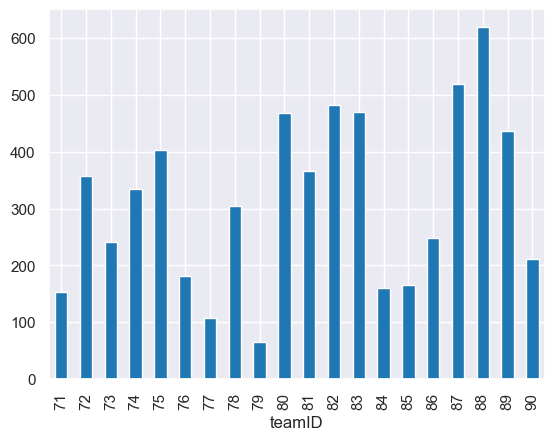

In [58]:
teamstats.groupby('teamID')['goals'].sum().head(20).plot(kind = 'bar')

### Teams **87 and 88** dominate in goal scoring, while teams **77 and 79** struggle offensively. The distribution suggests a competitive imbalance, with a few high-performing teams excelling while others lag behind. 🚀

<Axes: ylabel='yellowCards'>

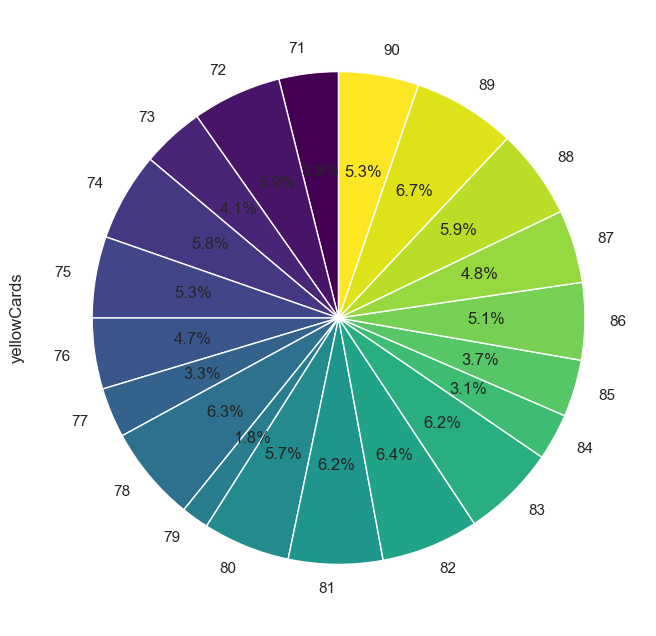

In [62]:
teamstats.groupby('teamID')['yellowCards'].sum().head(20).plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colormap='viridis')

### The pie chart shows the distribution of yellow cards among the top 20 teams, with some teams receiving significantly more than others. Teams 89 and 82 have the highest share, indicating aggressive or defensive playstyles, while team 79 has the lowest, suggesting a more disciplined approach. 🚀

<Axes: xlabel='teamID'>

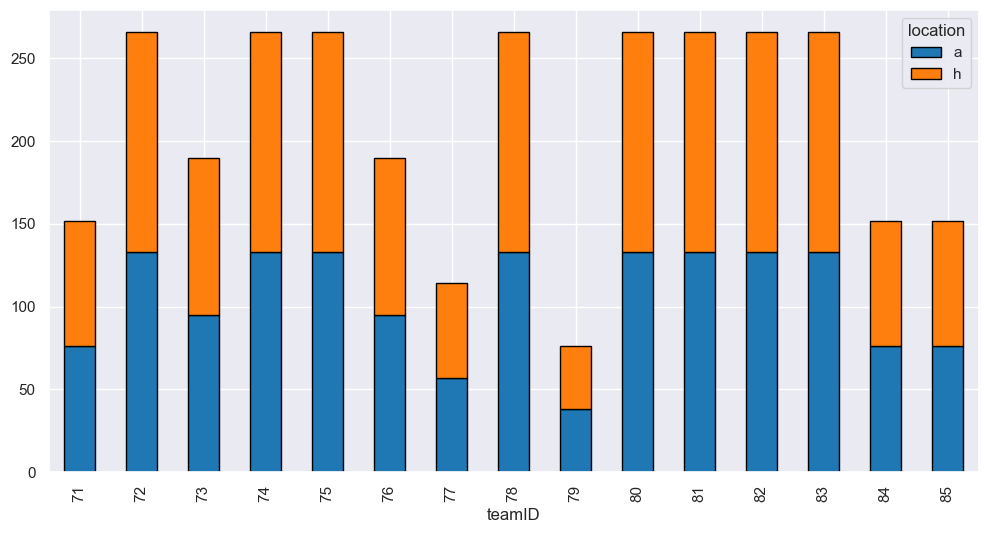

In [63]:
teamstats.groupby(['teamID', 'location']).size().unstack(fill_value=0).head(15).plot(kind='bar', figsize=(12, 6), stacked=True, edgecolor='black')

## 8. Conclusion

### This notebook provides a comprehensive exploratory data analysis of the football database. We have cleaned the data, performed initial analyses, and explored various aspects such as team statistics, player performances, and match outcomes. Further analyses can be conducted to gain deeper insights into the data.